In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')  
sns.set_theme(style="whitegrid")  

## Data Exploration

In [2]:
df = pd.read_csv("../build_dataset/output_csv/bloomberg_data.csv")

In [3]:
def remove_max_min_outliers(df):
    lower = df['Offer To 1st Close'].quantile(0.005)
    upper = df['Offer To 1st Close'].quantile(0.995)
    df = df[(df['Offer To 1st Close'] > lower) & (df['Offer To 1st Close'] < upper)].reset_index(drop=True)
    return df

df = remove_max_min_outliers(df)
df.shape

(5228, 24)

### Dataset Information

In [4]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Issuer Ticker                5228 non-null   object 
 1   Issuer Name                  5228 non-null   object 
 2   Offer Size (M)               5228 non-null   float64
 3   Sales - 1 Yr Growth          3307 non-null   float64
 4   Profit Margin                3503 non-null   float64
 5   Return on Assets             4508 non-null   float64
 6   Shares Outstanding (M)       5228 non-null   float64
 7   Offer Price                  5228 non-null   float64
 8   Offer To 1st Close           5228 non-null   float64
 9   Market Cap at Offer (M)      5228 non-null   float64
 10  Trade Date (US)              5030 non-null   object 
 11  cusip                        5228 non-null   object 
 12  Cash Flow per Share          4292 non-null   float64
 13  Instit Owner (Shar

### Describe

In [5]:
df_description = df.describe()
df_description

,Offer Size (M),Sales - 1 Yr Growth,Profit Margin,Return on Assets,Shares Outstanding (M),Offer Price,Offer To 1st Close,Market Cap at Offer (M),Cash Flow per Share,Instit Owner (Shares Held),Instit Owner (% Shares Out),Fed Rate,CPI,Consumer Confidence,Unemployment Rate
count,5228.000000,3307.000000,3503.000000,4508.000000,5228.000000,5228.000000,5228.000000,5228.000000,4292.000000,3.475000e+03,3.459000e+03,5023.000000,4872.000000,4997.000000,5013.000000
mean,275.193944,354.149950,-1965.515096,-50.520444,44.592307,27.627367,12.535475,723.440091,-310.355217,5.202394e+07,4.406336e+01,1.679451,0.271864,84.350570,5.647397
std,654.792584,9499.634577,22429.652331,1536.041270,164.061885,441.613052,28.676717,2732.559458,12366.039217,1.755321e+08,4.009214e+01,2.072441,0.345175,11.563634,1.759108
min,0.150000,-1025.400000,-562285.000000,-69151.100000,0.000000,0.030000,-41.083332,0.000000,-566821.000000,1.000000e+00,8.290000e-07,0.040000,-1.915290,50.000000,3.400000
25%,67.034750,-6.400000,-66.400000,-32.800000,10.614725,10.000000,0.000000,95.015000,-0.600000,1.290000e+06,8.030450e+00,0.090000,0.041494,76.000000,4.300000
50%,143.750000,7.200000,-5.900000,-2.700000,23.000000,12.000000,1.700000,255.892500,-0.017404,7.880000e+06,2.951000e+01,0.370000,0.251844,84.600000,5.400000
75%,287.500000,23.300000,7.000000,2.500000,39.704200,18.000000,16.631578,552.144750,1.400000,4.430000e+07,8.037905e+01,2.530000,0.524781,93.600000,6.300000
max,19650.400000,443745.000000,15853.300000,47045.400000,9022.560000,27000.000000,277.500000,81247.200000,23789.100000,5.000000e+09,1.930450e+02,6.860000,1.373608,112.000000,14.800000


### Count Duplicates

In [6]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicate_count}")

Number of duplicates: 0


### Count Unique

In [7]:
countunique = pd.DataFrame(df.nunique(), columns=['Count'])
countunique

,Count
Issuer Ticker,5225
Issuer Name,5206
Offer Size (M),3020
Sales - 1 Yr Growth,1284
Profit Margin,1753
Return on Assets,1365
Shares Outstanding (M),3813
Offer Price,252
Offer To 1st Close,2453
Market Cap at Offer (M),3841


### Missing Values

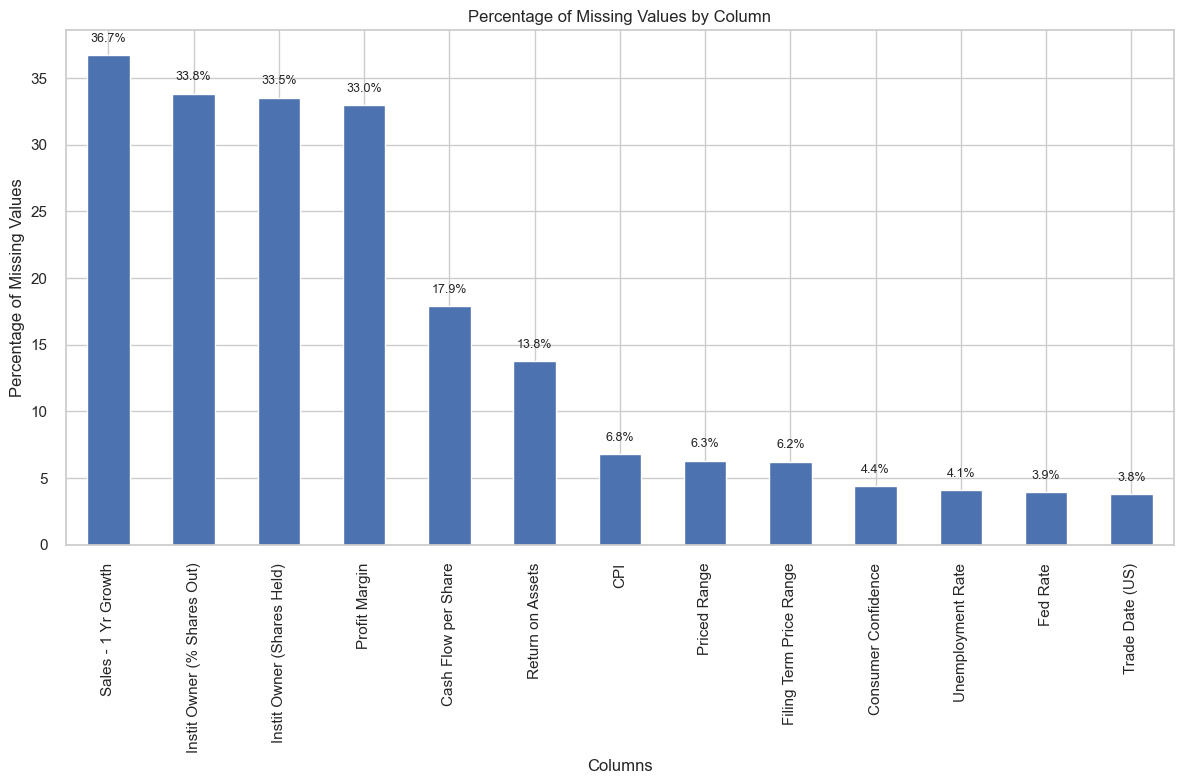

In [8]:
def missing_values_plot(df):
    # Missing values analysis
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentages
    }).sort_values('Percentage', ascending=False)

    missing_df = missing_df[missing_df['Missing Values'] > 0]
    
    plt.figure(figsize=(12, 8))
    ax = missing_df['Percentage'].plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=90)
    
    for i, v in enumerate(missing_df['Percentage']):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()

    return missing_df
    

missing_df = missing_values_plot(df)

In [9]:
missing_df

,Missing Values,Percentage
Sales - 1 Yr Growth,1921,36.744453
Instit Owner (% Shares Out),1769,33.837031
Instit Owner (Shares Held),1753,33.530987
Profit Margin,1725,32.995409
Cash Flow per Share,936,17.903596
Return on Assets,720,13.771997
CPI,356,6.809487
Priced Range,330,6.312165
Filing Term Price Range,326,6.235654
Consumer Confidence,231,4.418516


### Numerical Outliers

In [10]:
def numerical_outlier_analysis(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outlier_data = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)][col]
        if len(outliers) > 0:
            outlier_data.append({
                'Column': col,
                'Number of Outliers': len(outliers),
                'Percentage of Outliers': (len(outliers)/len(df))*100,
                'Lower Bound': Q1 - 1.5 * IQR,
                'Upper Bound': Q3 + 1.5 * IQR
            })
    
    outlier_df = pd.DataFrame(outlier_data)
    if not outlier_df.empty:
        display(outlier_df)

numerical_outlier_analysis(df)

,Column,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
0,Offer Size (M),443,8.473604,-2.636631e+02,6.181979e+02
1,Sales - 1 Yr Growth,463,8.856159,-5.095000e+01,6.785000e+01
2,Profit Margin,595,11.381025,-1.765000e+02,1.171000e+02
3,Return on Assets,427,8.167559,-8.575000e+01,5.545000e+01
4,Shares Outstanding (M),548,10.482020,-3.301949e+01,8.333841e+01
5,Offer Price,156,2.983933,-2.000000e+00,3.000000e+01
6,Offer To 1st Close,570,10.902831,-2.494737e+01,4.157895e+01
7,Market Cap at Offer (M),577,11.036725,-5.906796e+02,1.237839e+03
8,Cash Flow per Share,681,13.026014,-3.600000e+00,4.400000e+00
9,Instit Owner (Shares Held),416,7.957154,-6.322500e+07,1.088150e+08


### Distribution of IPO Offer Prices

In [11]:
# Reload the dataset
df_new = pd.read_csv("../build_dataset/output_csv/bloomberg_data.csv")
df_new['Trade Date (US)'] = pd.to_datetime(df_new['Trade Date (US)'], errors='coerce')

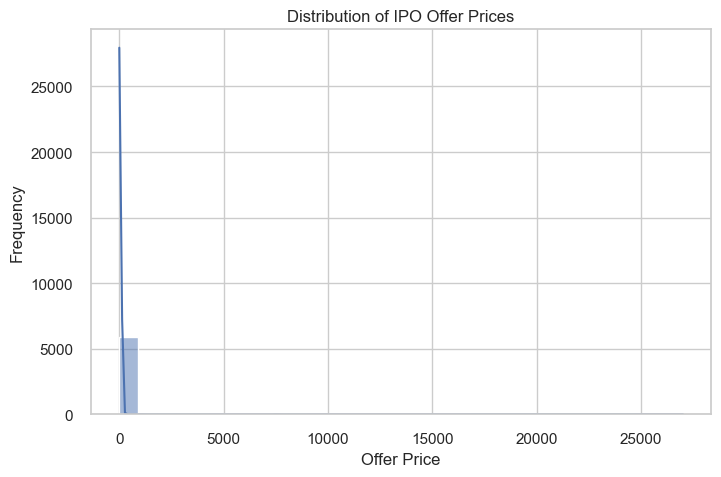

In [12]:
def offer_price_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Offer Price'].dropna(), bins=30, kde=True)
    plt.xlabel('Offer Price')
    plt.ylabel('Frequency')
    plt.title('Distribution of IPO Offer Prices')
    plt.show()

offer_price_distribution(df_new)

### Distribution of Market Capitalization at Offer

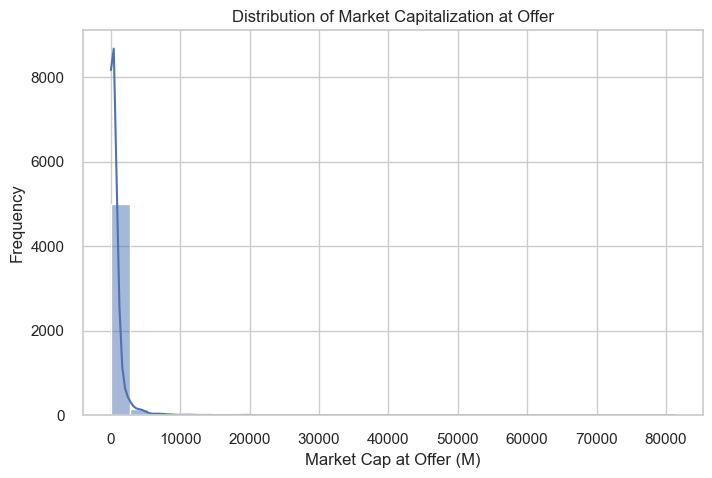

In [13]:
def market_cap_at_offer_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Market Cap at Offer (M)'].dropna(), bins=30, kde=True)
    plt.xlabel('Market Cap at Offer (M)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Market Capitalization at Offer')
    plt.show()

market_cap_at_offer_distribution(df)

### Number of IPOs over time

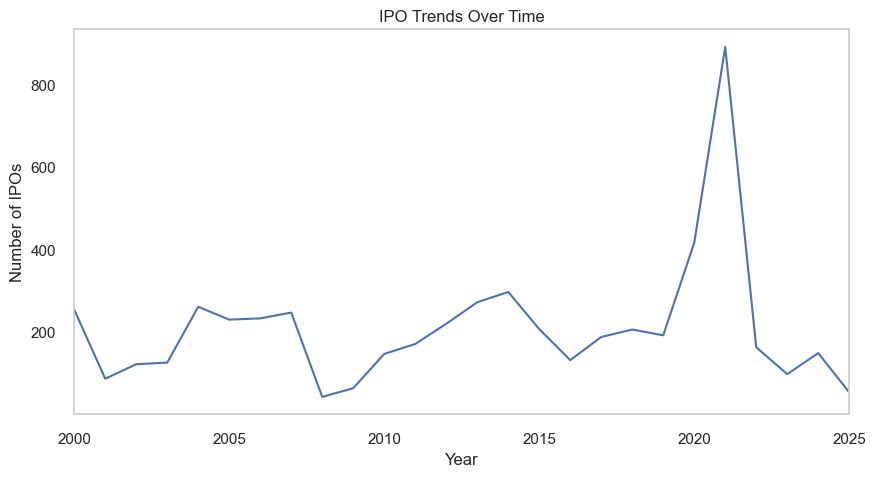

In [14]:
def number_of_ipos_over_time(df):
    df_tmp = df.copy()
    df_tmp.set_index('Trade Date (US)', inplace=True)
    df_tmp['IPO Count'] = 1
    ipo_trend = df_tmp.resample('YE')['IPO Count'].sum()

    plt.figure(figsize=(10, 5))
    ipo_trend.plot()
    plt.xlabel('Year')
    plt.ylabel('Number of IPOs')
    plt.title('IPO Trends Over Time')
    plt.grid(False)
    plt.show()

number_of_ipos_over_time(df_new)

### Industry Sector Distribution

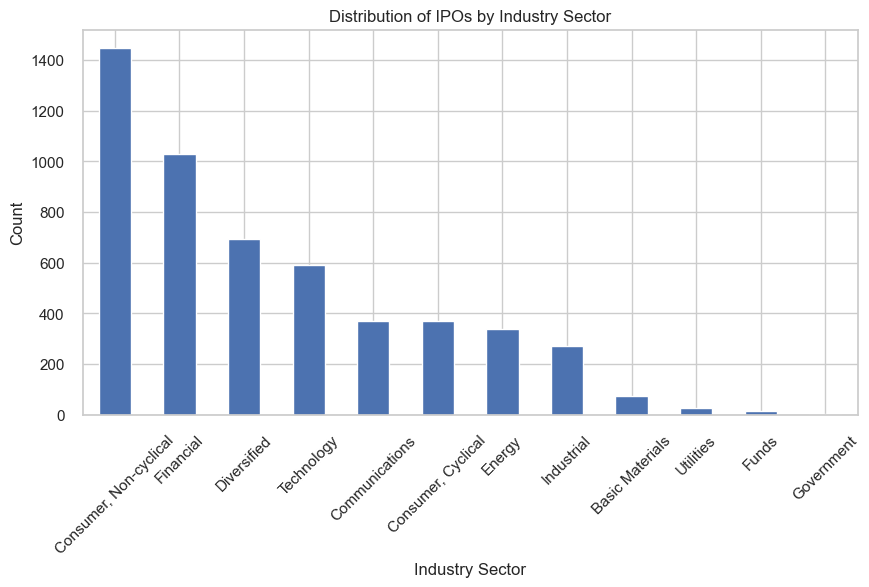

In [15]:
def industry_sector_distribution(df):
    plt.figure(figsize=(10, 5))
    df['Industry Sector'].value_counts().plot(kind='bar')
    plt.xlabel('Industry Sector')
    plt.ylabel('Count')
    plt.title('Distribution of IPOs by Industry Sector')
    plt.xticks(rotation=45)
    plt.show()

industry_sector_distribution(df)

### Correlation Matrix

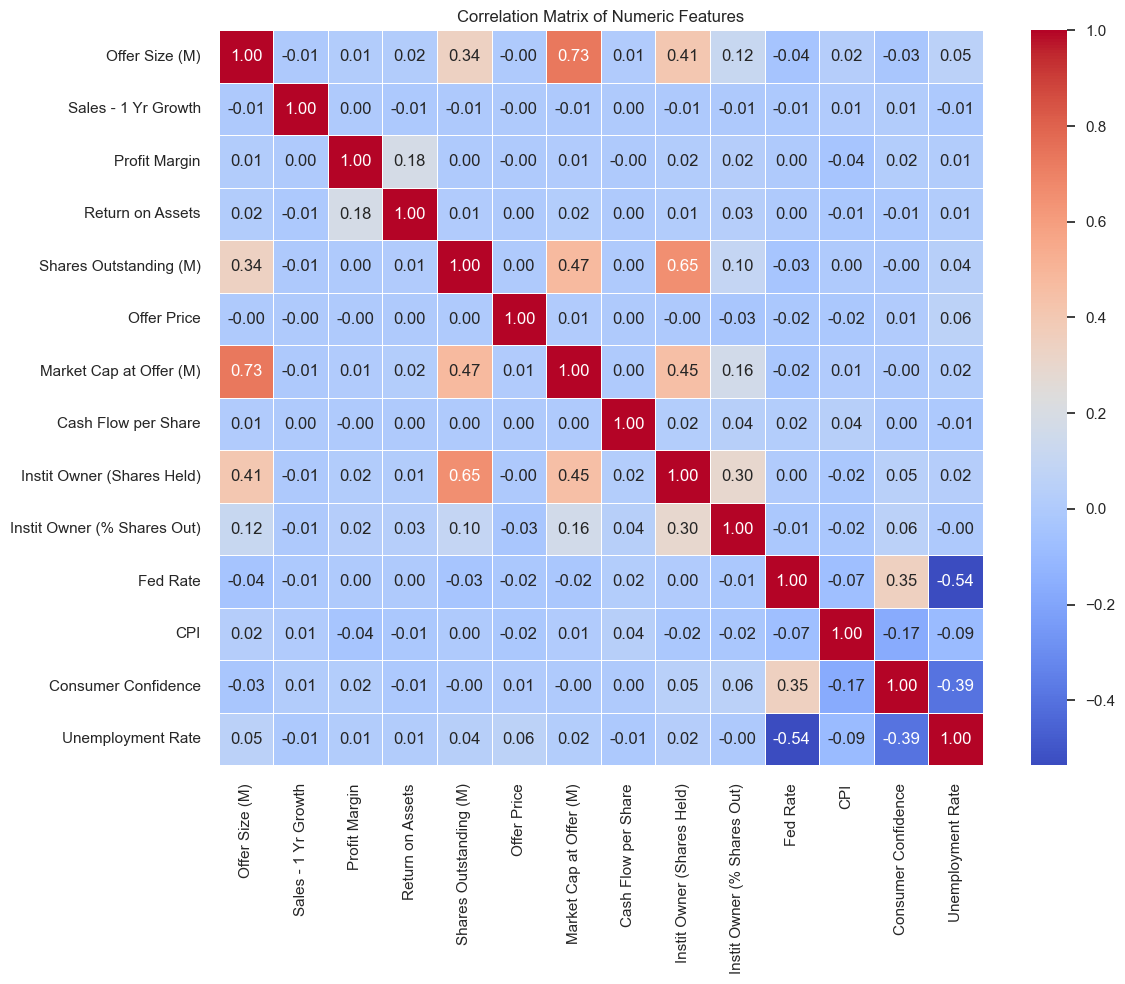

In [16]:
def correlation_matrix(df):
    """Perform comprehensive correlation analysis"""
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols[numeric_cols != 'Offer To 1st Close']
    
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', 
                fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numeric Features')
    plt.tight_layout()
    plt.show()

correlation_matrix(df)

### Offer To 1st Close Distribution

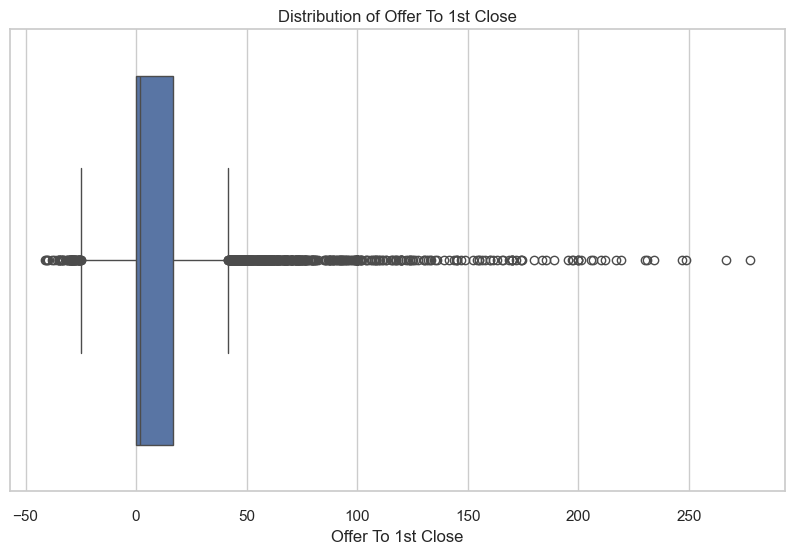

In [17]:
def offer_to_1st_close_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Offer To 1st Close'].dropna())
    plt.xlabel('Offer To 1st Close')
    plt.title('Distribution of Offer To 1st Close')
    plt.show()

offer_to_1st_close_distribution(df)

### Offer To 1st Close Distribution by Industry

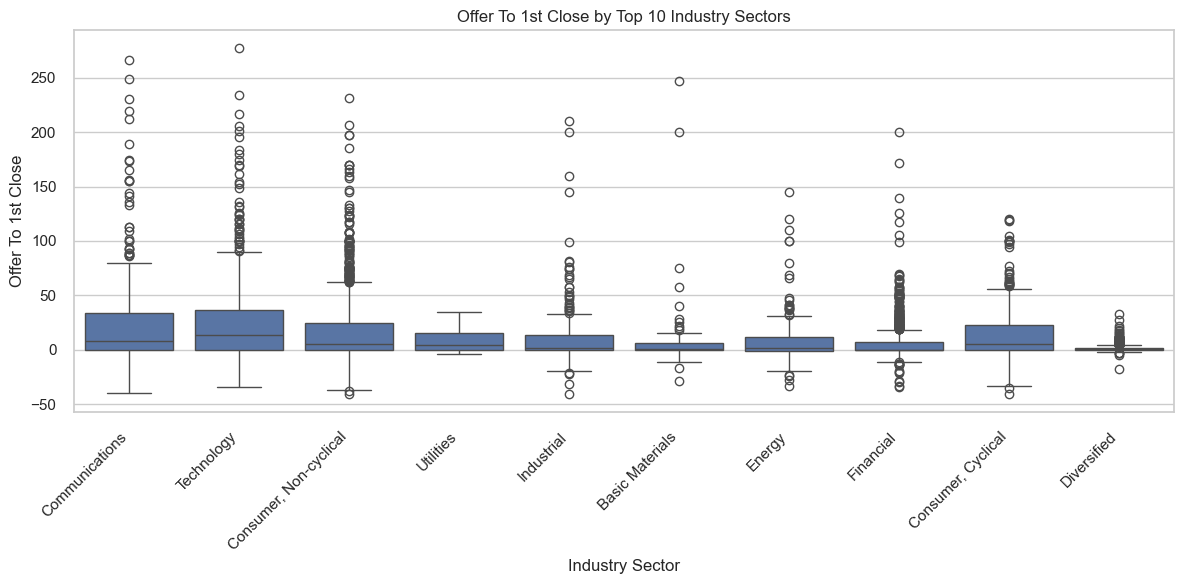

In [18]:
def analyze_target_variable(df):
    """Analyze the target variable (Offer To 1st Close)"""
    plt.figure(figsize=(12, 6))
    top_sectors = df['Industry Sector'].value_counts().head(10).index
    df_top_sectors = df[df['Industry Sector'].isin(top_sectors)].copy()
    
    df_top_sectors = df_top_sectors.reset_index(drop=True)
    ax = sns.boxplot(x='Industry Sector', y='Offer To 1st Close', data=df_top_sectors)
    plt.xticks(rotation=45, ha='right')
    plt.title('Offer To 1st Close by Top 10 Industry Sectors')
    plt.tight_layout()
    plt.show()


analyze_target_variable(df)